1. Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import accuracy_score

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [2]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
## lets check the basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


In [6]:
len(df[df.duplicated()])

0

In [7]:
df['credit_history'].value_counts()

credit_history
1.0    475
0.0     89
Name: count, dtype: int64

3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64


We can see that the following features have missing values

. credit_history
. self-employed
. loanamount
. loan_amount_term
. dependents
. gender
. married

In [9]:
def fill_empty_values_randomly(feature_name,possible_values_list):
    mask = df[feature_name].isnull()
    #count rows with NaNs
    l = mask.sum()
    #create array with size l
    s = np.random.choice(possible_values_list, size=l)
    #set NaNs values
    df.loc[mask, feature_name] = s

In [10]:
#Credit history is either 0 or 1 so we cannot replace the null values with mean so 
# we are going to select randomly from 1,0 and add it to the list. 
fill_empty_values_randomly('credit_history',[1,0])

# credit histroy takes a value as 0 or 1 
df['credit_history'] = df['credit_history'].astype(int)

In [11]:
#self_employed is either yes or no so we cannot replace the null values with mean so 
# we are going to select randomly from 'yes' or 'no'  and add it to the list. 
fill_empty_values_randomly('self_employed',['yes','no'])

In [12]:
def fill_empty_values_with_mean(feature_name):
    feature_mean=df[feature_name].mean()
    df[feature_name].fillna(value=feature_mean, inplace=True)

In [13]:
fill_empty_values_with_mean('loanamount')

In [14]:
fill_empty_values_with_mean('loan_amount_term')

In [15]:
#dependents cannot be a float value so we cannot replace it with mean 
#so we are going to select the values randomly from 0,1,2,3
fill_empty_values_randomly('dependents',[0,1,2,3])

In [16]:
fill_empty_values_randomly('gender',['male','female'])

In [17]:
fill_empty_values_randomly('married',['yes','no'])

In [18]:
df['total_income'] = df['applicantincome']+ df['coapplicantincome']

In [19]:
df = df.astype({"dependents":"int","total_income":"int","loan_amount_term":"int","loanamount":"int"})

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
total_income         0.0
dtype: float64


In [21]:
## dropping the column "loan_id"
df = df.drop(columns=['loan_id','applicantincome','coapplicantincome'],axis = 1)

In [22]:
df = df.rename(columns = {"loanamount": "loan_amount"})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            614 non-null    object
 1   married           614 non-null    object
 2   dependents        614 non-null    int32 
 3   education         614 non-null    object
 4   self_employed     614 non-null    object
 5   loan_amount       614 non-null    int32 
 6   loan_amount_term  614 non-null    int32 
 7   credit_history    614 non-null    int32 
 8   property_area     614 non-null    object
 9   loan_status       614 non-null    object
 10  total_income      614 non-null    int32 
dtypes: int32(5), object(6)
memory usage: 40.9+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,614.0,0.768730,1.019516,0.0,0.00,0.0,2.00,3.0
loan_amount,614.0,146.397394,84.037503,9.0,100.25,129.0,164.75,700.0
loan_amount_term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
credit_history,614.0,0.822476,0.382423,0.0,1.00,1.0,1.00,1.0
total_income,614.0,7024.703583,6458.664751,1442.0,4166.00,5416.5,7521.75,81000.0


In [25]:
df.describe(include = 'O').T

,count,unique,top,freq
gender,614,2,male,495
married,614,2,yes,399
education,614,2,graduate,480
self_employed,614,2,no,518
property_area,614,3,semiurban,233
loan_status,614,2,y,422


4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [26]:
def plot_categorical(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Distribution of {feature} by loan_status')
    plt.show()

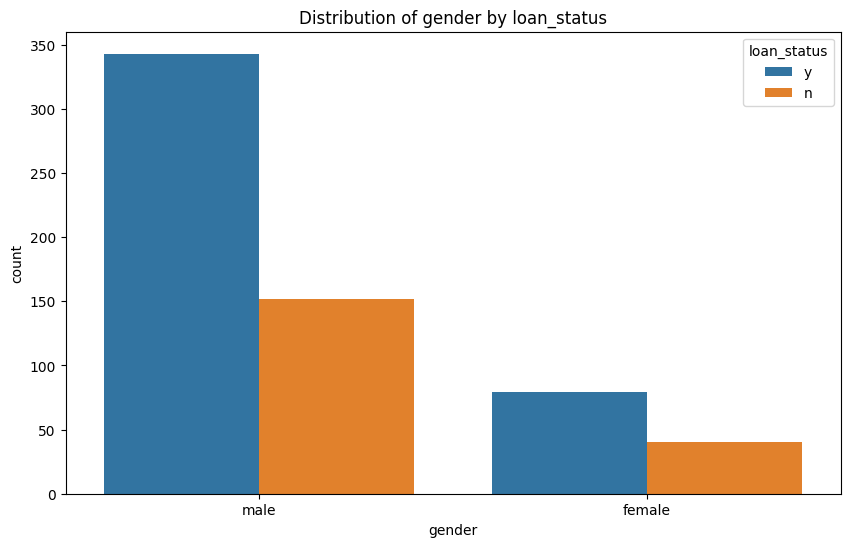

In [27]:
plot_categorical('gender')

. Males are more likely elgible for loans than females

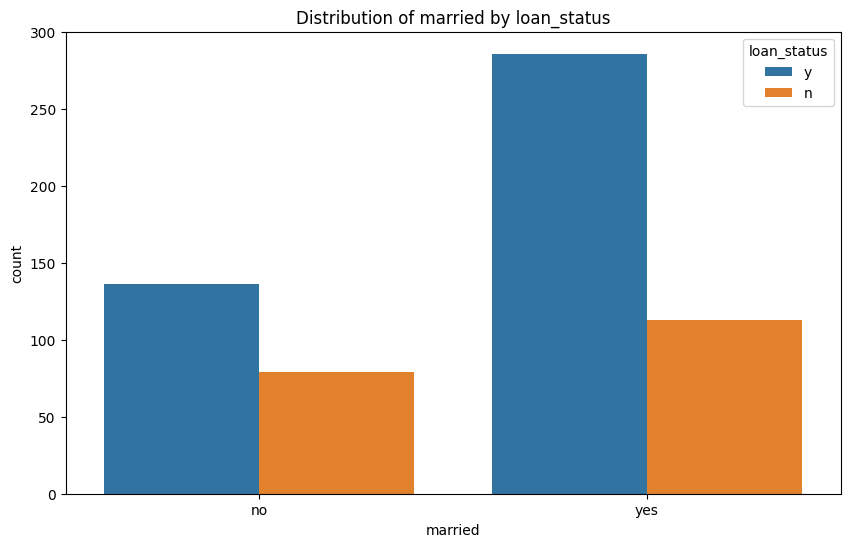

In [28]:
plot_categorical('married')

. On an average most of the married applicants are elgible for loan.

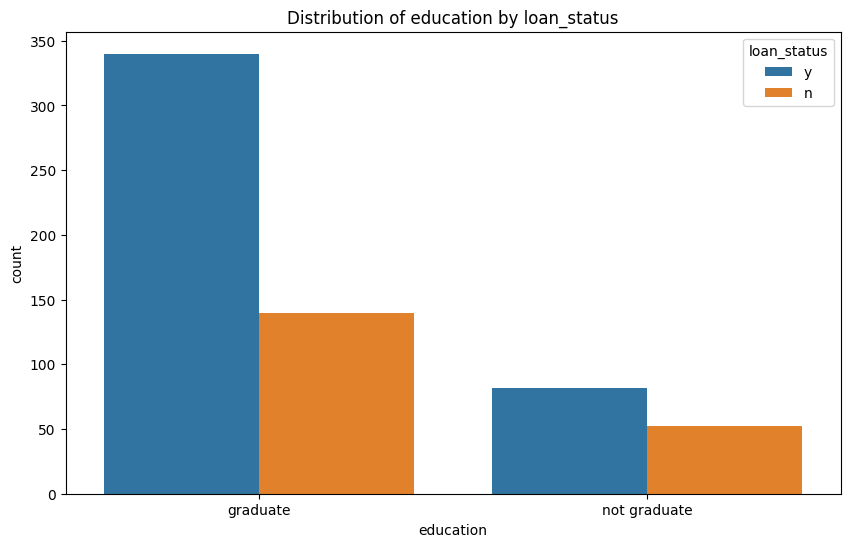

In [29]:
plot_categorical('education')

. it is diffcult for a non-graduate to be elgible for loan.

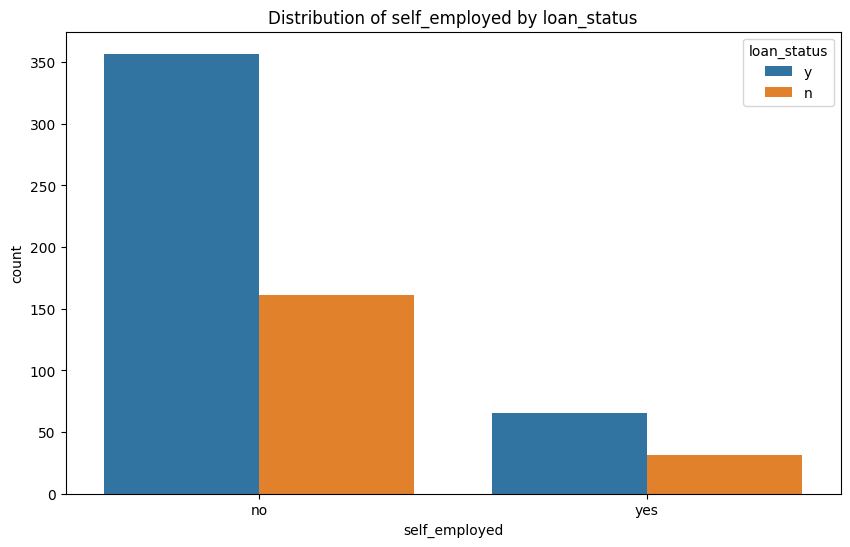

In [30]:
plot_categorical('self_employed')

. The probability for a non self-employeed individual to be elgible for loan is high.

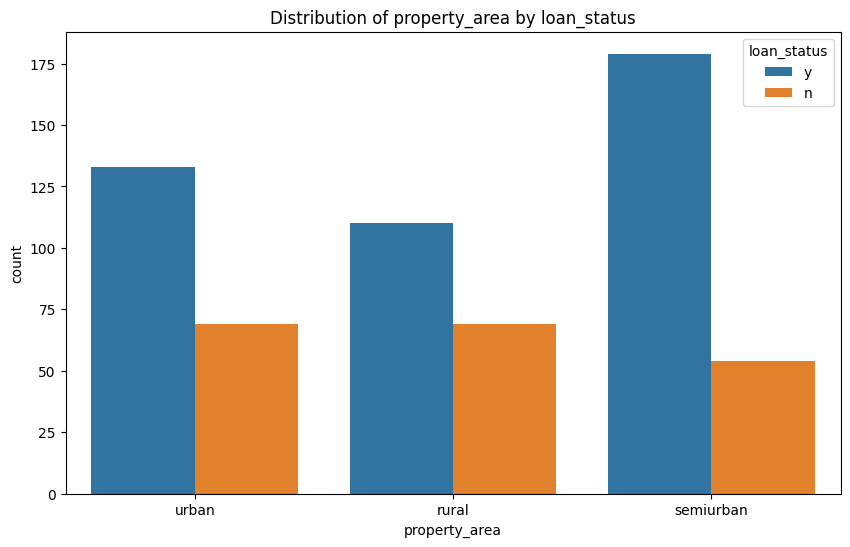

In [31]:
plot_categorical('property_area')

. if you are living in the semiurban area, you are more likely to be eligible for a loan.
The following are the inferences

. You are elgible for a loan in most of the cases if you are a male,married,gradute and non-self employed and live in a semi urban area.

5 Encode the categorical data

In [32]:
categorical_columns = ['gender','married','education','self_employed','loan_status','property_area']
le = LabelEncoder()
for i in categorical_columns:
        df[i] = df[[i]].apply(le.fit_transform)
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print("Mapping of column",i,"is",le_name_mapping)

Mapping of column gender is {'female': 0, 'male': 1}
Mapping of column married is {'no': 0, 'yes': 1}
Mapping of column education is {'graduate': 0, 'not graduate': 1}
Mapping of column self_employed is {'no': 0, 'yes': 1}
Mapping of column loan_status is {'n': 0, 'y': 1}
Mapping of column property_area is {'rural': 0, 'semiurban': 1, 'urban': 2}


In [33]:
df.head()

,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,1,0,0,0,0,146,360,1,2,1,5849
1,1,1,1,0,0,128,360,1,0,0,6091
2,1,1,0,0,1,66,360,1,2,1,3000
3,1,1,0,1,0,120,360,1,2,1,4941
4,1,0,0,0,0,141,360,1,2,1,6000


6. Separate the target and independent features and split the data into train and test

In [34]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=112)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(491, 10) (123, 10)
(491,) (123,)


7. Build any classification model to predict the loan status of the customer and save your model using pickle

In [36]:
## Let us build simple random forest regressor model
rf = RandomForestClassifier(n_estimators =30 , random_state =229)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=229)

In [37]:
## Let us check the r2-score to see hows our model is performing

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuray-score train:',accuracy_train)
print('accuracy-score test',accuracy_test)

accuray-score train: 0.9979633401221996
accuracy-score test 0.7479674796747967


Pickling - Creating a pickle file with an extension as .pkl

In [38]:
import pickle
# Saving model to disk
pickle.dump(rf, open('loan.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('loan.pkl','rb'))